<a href="https://www.kaggle.com/code/josealvaradoruiz/m6-ag1-grupo14?scriptVersionId=99646899" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

*PADAWANES*: 

* PAULA VALLEJO VARGAS
* JOSE ARMANDO ALVARADO RUIZ

# **Tema 3. Algoritmo de Naive-Bayes**

**Entrega: CLASIFICACIÓN DE NOTICIAS (HUFFPOST)**


# **Descripción de la tarea**

### Contexto

Este conjunto de datos contiene alrededor de 200.000 titulares de noticias del año 2012 al 2018 obtenidos de HuffPost. El modelo entrenado en este conjunto de datos podría usarse para identificar etiquetas de artículos de noticias sin seguimiento o para identificar el tipo de lenguaje utilizado en diferentes artículos de noticias. 

Se trata de un documento JSON con las siguientes claves: 

* Category: se trata de la categoría del artículo y es nuestra variable a estimar 
* Headline: titular de la noticia del HuffPost 
* Authors: autores de los artículos 
* Link: url de la noticia 
* Short_description: resumen del artículo 
* Date: fecha del artículo 

Con estos datos debes generar un modelo con el algoritmo de Naive-Bayes que consiga clasificar artículos atendiendo a sus titulares.

Consideraciones:

El tema de scrapping-web se entiende dado en módulos anteriores.

Pasos acerca del modelo:

* Lectura del archivo JSON y conversión a Pandas Dataframe
Realizar el tratamiento de textos vistos en el tema 3 de este módulo.
* Aplicar NaiveBayes analizando diferentes valores de “Alpha”
* Evaluar el modelo y comentar los resultados

Pasos acerca del webscrapping:

* Recoger más de 20 títulos de artículos de cada categoría (WELLNESS, PARENTING, TRAVEL, BUSINESS y SPORTS)
* Aplicarles TF-IDF Vectorizer
* Realizar las predicciones con el modelo creado.
* Evaluar y comentar los resultados

### **Importación librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")
%matplotlib inline

# Carga de Datos y visualización general

In [2]:
json_file = '../input/huffpost-data/act_grupal_News_Category_Dataset_v2.json'
df = pd.read_json(json_file, lines=True)

df.head(5)

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [3]:
df.shape

(200853, 6)

El dataset cuenta con 200853 registros y con 6 columnas.

In [4]:
df['category'].describe()

count       200853
unique          41
top       POLITICS
freq         32739
Name: category, dtype: object

Se cuenta con 41 categorias, las cuales la de mayor frecuencia es Politics con 32.739 artículos.

In [5]:
df.category.value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

Seleccionaremos solo las categorias solicitadas:

In [6]:
categories = ['WELLNESS', 'PARENTING', 'TRAVEL', 'BUSINESS', 'SPORTS']
df_news = df[df.category.isin(categories)]

In [7]:
df_news.head(5)

,category,headline,authors,link,short_description,date
80,SPORTS,Jets Chairman Christopher Johnson Won't Fine P...,Ron Dicker,https://www.huffingtonpost.com/entry/jets-chri...,“I never want to put restrictions on the speec...,2018-05-24
87,BUSINESS,"U.S. Launches Auto Import Probe, China Vows To...","David Shepardson and Jeff Mason, Reuters",https://www.huffingtonpost.com/entry/trump-aut...,The investigation could lead to new U.S. tarif...,2018-05-24
101,SPORTS,Trump Posthumously Pardons Boxer Jack Johnson,Lydia O'Connor,https://www.huffingtonpost.com/entry/trump-par...,The pardoning of the black heavyweight boxer i...,2018-05-24
126,TRAVEL,"14 Ways To Make Family Road Trips Easier, From...",Taylor Pittman,https://www.huffingtonpost.com/entry/family-ro...,Having waterproof covers on the seats is kind ...,2018-05-24
135,SPORTS,Anna Kournikova Dancing With Her Bouncing Baby...,Ron Dicker,https://www.huffingtonpost.com/entry/anna-kour...,The score is love-love.,2018-05-24


In [8]:
df_news.shape

(47212, 6)

Nuestro nuevo dataset queda con 47212 registros con 6 columnas. Ahora la distribución de noticias o artículos por cada una de estas categorias esta dado por:

In [9]:
df_news.category.value_counts()

WELLNESS     17827
TRAVEL        9887
PARENTING     8677
BUSINESS      5937
SPORTS        4884
Name: category, dtype: int64

Ahora vamos a seleccionar solo las columnas category, que es nuestra variable target y la columna Headline.

In [10]:
df_news = df_news[['category','headline']]

In [11]:
df_news.shape

(47212, 2)

Nuestro dataset final esta compuesto por 47212 registros y dos columnas.

In [12]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47212 entries, 80 to 200852
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  47212 non-null  object
 1   headline  47212 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


No contamos con valores nulos dentro de nuestro dataset.

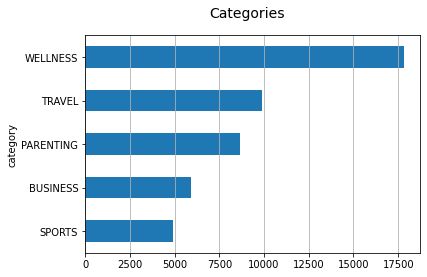

In [13]:
fig, ax = plt.subplots()
fig.suptitle("Categories", fontsize=14)
df_news["category"].reset_index().groupby("category").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [14]:
df_news.category.value_counts()/len(df_news)

WELLNESS     0.377595
TRAVEL       0.209417
PARENTING    0.183788
BUSINESS     0.125752
SPORTS       0.103448
Name: category, dtype: float64

La data presenta un desbalance ya que la proporción de artículos "wellness" es bastante superior a las 4 otras categorias con un 37.7% de los registros. Además las categorias con menor cantidad de artículos son "Business" y "Sports" con un 12 y 10% respectivamente. 

# Tratamiento de Texto y aplicacion Naive-Bayes

## Utilizacion TFidVectorizer

In [15]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.pipeline import Pipeline
import seaborn as sns
from time import time
import datetime

nltk.download('stopwords')
len(stopwords.words('english'))

vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
vectorizer.fit(df_news["headline"].values)
vect = vectorizer.transform(df_news["headline"].values)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
vect.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
vocab = np.sort(list(vectorizer.vocabulary_.keys()))
df_tf = pd.DataFrame(vect.todense(), columns = vocab)
print(df_tf.shape)
df_tf.head()

(47212, 26770)


,00,000,000th,007,01,012,013,014,02,080,...,zyberk,zylowska,zynga,zyola,zytiga,zzs,zzz,zzzs,élysées,étretat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Seleccionamos la data de train y test. Para entrenar se utilizará el 80%, mientras 
# que se dejará 20% para testear.

X = df_tf.values
y = df_news["category"].values

train_data, test_data, train_target, test_target = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)
print (train_data.shape, train_target.shape)
print (test_data.shape, test_target.shape)

(37769, 26770) (37769,)
(9443, 26770) (9443,)


In [19]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB(alpha=1.0)

mnb_model.fit(train_data, train_target)
pred_train = mnb_model.predict(train_data)
pred_test = mnb_model.predict(test_data)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*mnb_model.score(train_data, train_target)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*mnb_model.score(test_data, test_target)))


Precisión sobre los datos de entrenamiento: 83.64
Precisión sobre los datos de test: 76.97


Vemos que aplicando el modelo con el algoritmo MultinomialNB y con un alpha = 1, la precisión para los datos de train es de un 83.6%, mientras que para la data test de un 76.97%. No es un mal resultado, pero veremos que podemos mejorarlo al aplicar hiperparametros, y probando con una variación al algoritmo señalado.

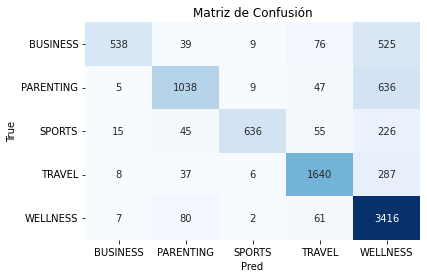

In [20]:
## Plot confusion matrix
classes = np.unique(test_target)
cm = confusion_matrix(test_target, pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Matriz de Confusión")
plt.yticks(rotation=0)

plt.show()

In [21]:
cr = classification_report(test_target, pred_test)
print(cr)

              precision    recall  f1-score   support

    BUSINESS       0.94      0.45      0.61      1187
   PARENTING       0.84      0.60      0.70      1735
      SPORTS       0.96      0.65      0.78       977
      TRAVEL       0.87      0.83      0.85      1978
    WELLNESS       0.67      0.96      0.79      3566

    accuracy                           0.77      9443
   macro avg       0.86      0.70      0.75      9443
weighted avg       0.81      0.77      0.76      9443



Vemos que el modelo generado tiene una alta precision para las clases Business y Sport (sobre 90%), pero una muy baja precision en la categoria de mayor presencia que es Wellness con un 67%, mientras que su Recall es de un 96% en esta clase.

## Optimizado mediante Pipeline, RandomizedSearchCV e Hiperparametros

Vamos a trabajar con la clase Pipeline de Scikit-learn para asi realizar varios trabajos de tratamiento de texto como de modelado utilizando dos algoritmos, Multinominal y ComplementNB, ambos basados en Naive-Bayes.

La clase Pipeline de Scikit-learn está diseñada como una forma manejable de aplicar una serie de transformaciones de datos seguidas por la aplicación de un estimador. En definitiva, esta sencilla herramienta es útil para:

* Conveniencia en la creación de un flujo de trabajo coherente y fácil de entender
* Aplicación de la implementación del flujo de trabajo y el orden deseado de las aplicaciones de paso
* Reproducibilidad
* Valor en la persistencia de objetos enteros del pipeline (va a la reproducibilidad y la conveniencia)

In [22]:
# Importación de librerias asociadas a tratamiento de texto y modelo Naive-Bayes

def segundos_a_minutos(segundos):
    horas = int(segundos / 60 / 60)
    segundos -= horas*60*60
    minutos = int(segundos/60)
    segundos -= minutos*60
    return f"{horas:02d}:{minutos:02d}:{segundos:02d}"

In [23]:
train_df, test_df = train_test_split(df_news, test_size=0.2, random_state=42, stratify=df_news["category"])
train_data = train_df["headline"]
train_target = train_df["category"]
test_data = test_df["headline"]
test_target = test_df["category"]

El tamaño de cada uno de nuestros dataset:

In [24]:
train_data.shape, train_target.shape, test_data.shape, test_target.shape

((37769,), (37769,), (9443,), (9443,))

Definimos nuestro Pipeline, indicandole los 3 pasos que queremos realizar:

* tfidf: Utilizaremos TfidfVectorizer que nos permitirá tokenizar documentos, aprender el vocabulario y las ponderaciones inversas de frecuencia de documentos, y nos permitirá codificar nuevos documentos.
* reduce_dim : Vamos a reducir dimensionalidad mediante la clase TruncatedSVD, este transformador realiza una reducción de la dimensionalidad lineal mediante descomposición en valores singulares truncados (SVD). A diferencia de PCA, este estimador no centra los datos antes de calcular la descomposición en valores singulares. Esto significa que puede trabajar con matrices dispersas de manera eficiente.
* classifier: En este primer ejemplo, se utilizara MultinominalNB

In [25]:
pipeline = Pipeline(
    steps=[
        ("tfidf", TfidfVectorizer()),
        ("reduce_dim", TruncatedSVD(n_components=10)),
        ("classifier", MultinomialNB()),
    ]
)

In [26]:
# Podemos obtener los parametros asociados a nuestro pipeline
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf', 'reduce_dim', 'classifier', 'tfidf__analyzer', 'tfidf__binary', 'tfidf__decode_error', 'tfidf__dtype', 'tfidf__encoding', 'tfidf__input', 'tfidf__lowercase', 'tfidf__max_df', 'tfidf__max_features', 'tfidf__min_df', 'tfidf__ngram_range', 'tfidf__norm', 'tfidf__preprocessor', 'tfidf__smooth_idf', 'tfidf__stop_words', 'tfidf__strip_accents', 'tfidf__sublinear_tf', 'tfidf__token_pattern', 'tfidf__tokenizer', 'tfidf__use_idf', 'tfidf__vocabulary', 'reduce_dim__algorithm', 'reduce_dim__n_components', 'reduce_dim__n_iter', 'reduce_dim__random_state', 'reduce_dim__tol', 'classifier__alpha', 'classifier__class_prior', 'classifier__fit_prior'])

In [27]:
# Definimos los parametros que queremos que RandomzedSearchCV utilice para determinar los mejores estimadores
nb_param_grid = {
    "reduce_dim": ["passthrough", TruncatedSVD(10), TruncatedSVD(20)],
    "tfidf__analyzer": ["word", "char"],
    "tfidf__smooth_idf": [True, False],
    "tfidf__ngram_range": [(1, 1), (1, 2),(2,2)],
    "tfidf__use_idf": [True, False],
    "tfidf__stop_words": [STOP_WORDS],
    "classifier__fit_prior": [True, False],
    "classifier__alpha": [0.1, 0.5, 1, 5, 10]
}

En el parametro reduce_dim utlizamos TruncatedSVD con 10 y 20. "passthrough" es si NO desea usar "reduce_dim" en una de sus ejecuciones.

tdfif__analyzer: Se refiere a que la función debe estar compuesta por n-gramas de palabras o de caracteres. 

tfidf__ngram_range: El límite inferior y superior del rango de valores n para diferentes n-gramas que se extraerán. Se utilizarán todos los valores de n tales que min_n <= n <= max_n.

tfidf__stop_words: Se utilizaran la lista en ingles de la libreria scipy.

classifier__alpha: Acá probaremos con diferentes alpha para ver cual es el mejor segun nuestros datos.




Utilizamos la Clase RandomizedSearchCV para la búsqueda de los mejores parametros. Además de entrenar nuestro modelo y optimizarlo mediante Cross-Validation.

In [28]:
start = time()
print("Fitting started...")
search = RandomizedSearchCV(pipeline, 
                            param_distributions=nb_param_grid, 
                            verbose=1,
                            cv=5,
                            random_state=42)
search.fit(train_data, train_target)
end = time()
tiempo_train = segundos_a_minutos(int(end - start))
print(f"Tiempo de Entrenamiento {tiempo_train}")

Fitting started...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tiempo de Entrenamiento 00:02:16


Los mejores parametros encontrados son:

In [29]:
search.best_params_

{'tfidf__use_idf': False,
 'tfidf__stop_words': {"'d",
  "'ll",
  "'m",
  "'re",
  "'s",
  "'ve",
  'a',
  'about',
  'above',
  'across',
  'after',
  'afterwards',
  'again',
  'against',
  'all',
  'almost',
  'alone',
  'along',
  'already',
  'also',
  'although',
  'always',
  'am',
  'among',
  'amongst',
  'amount',
  'an',
  'and',
  'another',
  'any',
  'anyhow',
  'anyone',
  'anything',
  'anyway',
  'anywhere',
  'are',
  'around',
  'as',
  'at',
  'back',
  'be',
  'became',
  'because',
  'become',
  'becomes',
  'becoming',
  'been',
  'before',
  'beforehand',
  'behind',
  'being',
  'below',
  'beside',
  'besides',
  'between',
  'beyond',
  'both',
  'bottom',
  'but',
  'by',
  'ca',
  'call',
  'can',
  'cannot',
  'could',
  'did',
  'do',
  'does',
  'doing',
  'done',
  'down',
  'due',
  'during',
  'each',
  'eight',
  'either',
  'eleven',
  'else',
  'elsewhere',
  'empty',
  'enough',
  'even',
  'ever',
  'every',
  'everyone',
  'everything',
  'every

In [30]:
model_nb = search.best_estimator_

In [31]:
accuracy_train_nb = round(model_nb.score(train_data,train_target),5)
accuracy_test_nb = round(model_nb.score(test_data,test_target),5)

print(f'Train Accuracy : {accuracy_train_nb}')
print(f'Test Accuracy  : {accuracy_test_nb}')

Train Accuracy : 0.87082
Test Accuracy  : 0.80674


El modelo utilizando Multinomial y aplicando hiperparametros encontrados mediante RandomizedSearchCV nos entrega una mejor precisión tanto en train como en test, comparado con el modelo y los parametros por defecto.

In [32]:
y_pred = model_nb.predict(test_data)
cr = classification_report(test_target, y_pred)
print(cr)

              precision    recall  f1-score   support

    BUSINESS       0.91      0.55      0.68      1187
   PARENTING       0.83      0.68      0.75      1735
      SPORTS       0.93      0.76      0.83       977
      TRAVEL       0.86      0.86      0.86      1978
    WELLNESS       0.74      0.94      0.83      3566

    accuracy                           0.81      9443
   macro avg       0.85      0.76      0.79      9443
weighted avg       0.82      0.81      0.80      9443



Vemos como sube la precisión en nuestra clase mayoritaria que es Welness, manteniendo un alto Recall.

In [33]:
# Predicciones:
compare_model_nb = pd.DataFrame({'test_data' : test_target, 
                                'prediction_data': y_pred
                              })
compare_model_nb.sample(10)

,test_data,prediction_data
51771,SPORTS,WELLNESS
143632,WELLNESS,WELLNESS
190219,PARENTING,WELLNESS
143095,WELLNESS,WELLNESS
192077,WELLNESS,WELLNESS
125562,TRAVEL,TRAVEL
179671,TRAVEL,WELLNESS
101536,BUSINESS,TRAVEL
180807,WELLNESS,WELLNESS
168958,TRAVEL,TRAVEL


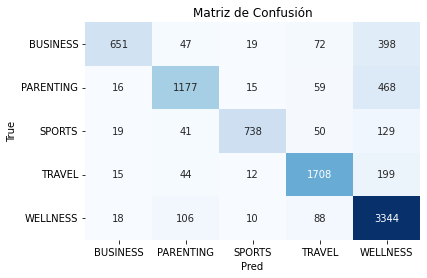

In [34]:
## Plot confusion matrix
classes = np.unique(test_target)
cm = confusion_matrix(test_target, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Matriz de Confusión")
plt.yticks(rotation=0)

plt.show()

El modelo es capaz de predecir 3344 artículos correctamente en Wellness de 3566 artículos.

### ComplementNB

Ahora realizaremos el mismo proceso, pero utilizaremos el algoritmo ComplementNB(). ComplementNB implementa el algoritmo Complemento de Naives-Bayes (CNB). CNB es una adaptación del algoritmo multinomial Naive Bayes (MNB) estándar que es especialmente adecuado para conjuntos de datos desequilibrados. Específicamente, CNB usa estadísticas del complemento de cada clase para calcular los pesos del modelo. Los inventores de CNB muestran empíricamente que las estimaciones de parámetros para CNB son más estables que las de MNB. Además, CNB supera regularmente a MNB (a menudo por un margen considerable) en tareas de clasificación de texto.

In [35]:
pipeline_CNB = Pipeline(
    steps=[
        ("tfidf", TfidfVectorizer()),
        ("reduce_dim", TruncatedSVD(n_components=10)),
        ("classifier", ComplementNB())
    ]
)

Utilizaremos los mismos parametros del clasificador anterior.

In [36]:
start = time()
print("Fitting started...")
search = RandomizedSearchCV(pipeline_CNB, 
                            param_distributions=nb_param_grid, 
                            verbose=1,
                            cv=5,
                            random_state=42)
search.fit(train_data, train_target)
end = time()
tiempo_train = segundos_a_minutos(int(end - start))
print(f"Tiempo de Entrenamiento {tiempo_train}")

Fitting started...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tiempo de Entrenamiento 00:02:12


In [37]:
search.best_params_

{'tfidf__use_idf': True,
 'tfidf__stop_words': {"'d",
  "'ll",
  "'m",
  "'re",
  "'s",
  "'ve",
  'a',
  'about',
  'above',
  'across',
  'after',
  'afterwards',
  'again',
  'against',
  'all',
  'almost',
  'alone',
  'along',
  'already',
  'also',
  'although',
  'always',
  'am',
  'among',
  'amongst',
  'amount',
  'an',
  'and',
  'another',
  'any',
  'anyhow',
  'anyone',
  'anything',
  'anyway',
  'anywhere',
  'are',
  'around',
  'as',
  'at',
  'back',
  'be',
  'became',
  'because',
  'become',
  'becomes',
  'becoming',
  'been',
  'before',
  'beforehand',
  'behind',
  'being',
  'below',
  'beside',
  'besides',
  'between',
  'beyond',
  'both',
  'bottom',
  'but',
  'by',
  'ca',
  'call',
  'can',
  'cannot',
  'could',
  'did',
  'do',
  'does',
  'doing',
  'done',
  'down',
  'due',
  'during',
  'each',
  'eight',
  'either',
  'eleven',
  'else',
  'elsewhere',
  'empty',
  'enough',
  'even',
  'ever',
  'every',
  'everyone',
  'everything',
  'everyw

In [38]:
model_cnb = search.best_estimator_

In [39]:
accuracy_train_cnb = round(model_cnb.score(train_data,train_target),5)
accuracy_test_cnb = round(model_cnb.score(test_data,test_target),5)

print(f'Train Accuracy : {accuracy_train_cnb}')
print(f'Test Accuracy  : {accuracy_test_cnb}')

Train Accuracy : 0.97069
Test Accuracy  : 0.83427


Vemos que este algoritmo mejora bastante la precisión tanto en train (97%) como en test (83%) comparado ya el modelo anterior optimizado con Multinomial.

In [40]:
y_pred = model_cnb.predict(test_data)
cr = classification_report(test_target, y_pred)
print(cr)

              precision    recall  f1-score   support

    BUSINESS       0.85      0.67      0.75      1187
   PARENTING       0.82      0.74      0.78      1735
      SPORTS       0.87      0.88      0.88       977
      TRAVEL       0.85      0.90      0.88      1978
    WELLNESS       0.82      0.88      0.85      3566

    accuracy                           0.83      9443
   macro avg       0.84      0.82      0.83      9443
weighted avg       0.83      0.83      0.83      9443



Podemos ver que aunque no existen clases con precisiones sobre 90%, todas las categorias se comportan con una precisión muy similar.

In [41]:
compare_model_cnb = pd.DataFrame({'test_data' : test_target, 
                                'prediction_data': y_pred
                              })
compare_model_cnb.sample(10)

,test_data,prediction_data
160614,WELLNESS,WELLNESS
200012,WELLNESS,WELLNESS
130291,PARENTING,PARENTING
181904,TRAVEL,TRAVEL
153883,WELLNESS,WELLNESS
140115,TRAVEL,TRAVEL
114231,BUSINESS,BUSINESS
173680,WELLNESS,WELLNESS
183081,TRAVEL,TRAVEL
150603,WELLNESS,WELLNESS


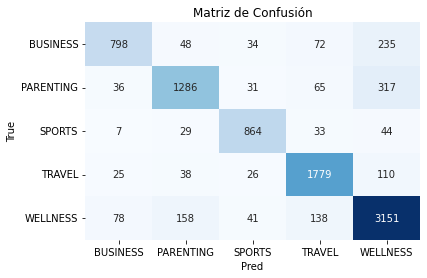

In [42]:
## Plot confusion matrix
classes = np.unique(test_target)
cm = confusion_matrix(test_target, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Matriz de Confusión")
plt.yticks(rotation=0)

plt.show()

Analizando ambos resultados de los modelos utilizados, podemos ver que el algoritmo ComplementNB con los parámetros encontrados mediante el uso de Pipeline y RandomizedSeachCV pudimos mejorar en forma considerble el modelo inicial basado en MultinomialNB y con los parámetros por defecto.

# Analisis de Data scrapeada

Se realizo el scrapeado de nuevas noticias de las categorías definidas mediante Selenium y Python(Ver Notebook scraper).

In [43]:
df_scrap = pd.read_csv('../input/huffpost-news-scraping/news.csv')
df_scrap = df_scrap.sample(frac=1.0, random_state=42)
df_scrap.head()

,Unnamed: 0,Headline,Authors,Links,Short_description,Category,Date
108,108,Walmart’s Juneteenth-Themed Ice Cream Ignites ...,Jazmin Tolliver,https://www.huffpost.com/entry/walmart-junetee...,The company issued an apology after widespread...,business,"May 24, 2022, 04:22 PM EDT"
67,67,The Last Howard Johnson's Restaurant In Americ...,Ed Mazza,https://www.huffpost.com/entry/last-howard-joh...,It was once among the nation's biggest chain r...,travel,"Jun 2, 2022, 05:28 AM EDT | Updated Jun 2, 2022"
31,31,My Daughter Almost Died At Summer Camp. Here's...,Stephanie Karp,https://www.huffpost.com/entry/summer-camp-ill...,"""When my husband emerges from the camp infirma...",parenting,"Jun 26, 2022, 09:00 AM EDT | Updated Jun 26, 2022"
119,119,Alexandria Ocasio-Cortez Says Anti-Roe Trump J...,Ron Dicker,https://www.huffpost.com/entry/alexandria-ocas...,The progressive House member said conservative...,sport,"Jun 27, 2022, 07:20 AM EDT"
42,42,Harry Styles Helps Concert Attendee Come Out A...,Curtis M. Wong,https://www.huffpost.com/entry/harry-styles-he...,The Grammy winner paused his show at London's ...,parenting,"Jun 21, 2022, 05:49 PM EDT"


Tamaño de dataset scrapeada:

In [44]:
df_scrap.shape

(140, 7)

Distribución de categorias:

In [45]:
df_scrap.Category.value_counts()

business     30
parenting    30
sport        30
wellness     28
travel       22
Name: Category, dtype: int64

Vamos a trabajar con este dataset para validar nuestro modelo generado en el apartado anterior mediante el algoritmo ComplementNB.

In [46]:
validation = df_scrap[['Headline','Category']]

In [47]:
validation.shape

(140, 2)

Ahora realizaremos los tratamientos de textos aplicados sobre la data json. Utilizaremos TfidfVectorizer con stop_word.

In [48]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Aca utilizamos el fit del ejercicio anterior.
# El metodo Transform permite recibir un documento nuevo con el vocabulario ya generado.
vect_2 = vectorizer.transform(validation["Headline"].values)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
# Realizamos las transformaciones antes de aplicar el modelo:
vocab = np.sort(list(vectorizer.vocabulary_.keys()))
df_tf2 = pd.DataFrame(vect_2.todense(), columns = vocab)
print(df_tf2.shape)
df_tf2.head()

(140, 26770)


,00,000,000th,007,01,012,013,014,02,080,...,zyberk,zylowska,zynga,zyola,zytiga,zzs,zzz,zzzs,élysées,étretat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Definimos nuestras variables predictoras y target, basado en nuestra nueva data
X = df_tf2.values
y = validation["Category"].values

Utilizaremos el modelo ComplementNB con los mejores parametros encontrados en nuestro ejercicio anterior.

In [51]:
start = time()
print("Fitting started...")
search2 = ComplementNB(fit_prior=True,alpha=1)
search2.fit(X, y)
end = time()
tiempo_train = segundos_a_minutos(int(end - start))
print(f"Tiempo de Entrenamiento {tiempo_train}")

Fitting started...
Tiempo de Entrenamiento 00:00:00


## 

In [52]:
y_pred = search2.predict(X)

In [53]:
print("Accuracy Data Validacion:", search2.score(X,y))

Accuracy Data Validacion: 0.8714285714285714


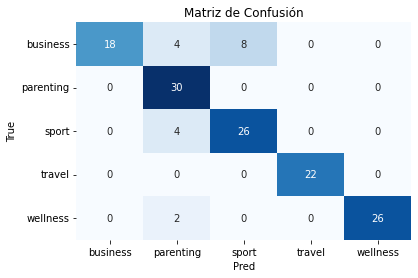

In [54]:
## Plot confusion matrix
classes = np.unique(y)
cm = confusion_matrix(y, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Matriz de Confusión")
plt.yticks(rotation=0)

plt.show()

In [55]:
cr = classification_report(y, y_pred)
print(cr)

              precision    recall  f1-score   support

    business       1.00      0.60      0.75        30
   parenting       0.75      1.00      0.86        30
       sport       0.76      0.87      0.81        30
      travel       1.00      1.00      1.00        22
    wellness       1.00      0.93      0.96        28

    accuracy                           0.87       140
   macro avg       0.90      0.88      0.88       140
weighted avg       0.90      0.87      0.87       140



Vemos que el modelo ComplementNB con los mejores parametros encontrados en la sección anterior (alpha=1 y fit_prior=True) aplicado a la data del scraping me genera una precisión del 87%, que es bastante buena, considerando que la precisión para los datos de test fue de un 83%. Además podemos visualizar mediante el reporte de clasificación que en algunas clases la precisión es cercana a 100%, siendo parenting la que me entrega menor precisión con un 75% al igual que Sport con un 76%.